# Top Merchants Spending Breakdown
-----------------------------------

**Goal:**  
Identify major spending sources by assigning merchants based on transaction categories and calculating total expenses.

**Steps:**
1. Clean transaction descriptions (lowercase + regex).
2. Assign categories based on keywords.
3. Simulate merchant names based on category.
4. Aggregate total spending by merchant.
5. Visualize top 10 merchants with a horizontal bar chart.
6. Save chart as PNG.
7. Provide insights based on the results.


Top merchants:
        merchant  total_spending
0  OtherMerchant    2.959185e+08
1        Walmart    1.310836e+07
2         Amazon    1.290665e+07
3         Target    1.287272e+07
4        BestBuy    1.245377e+07
5        Spotify    9.292125e+06
6        Netflix    9.067867e+06
7       Cineplex    8.945943e+06
8            AMC    8.873504e+06
9           ILAC    8.659116e+06
Chart saved to: output\top_merchants.png


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19744\4108410177.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


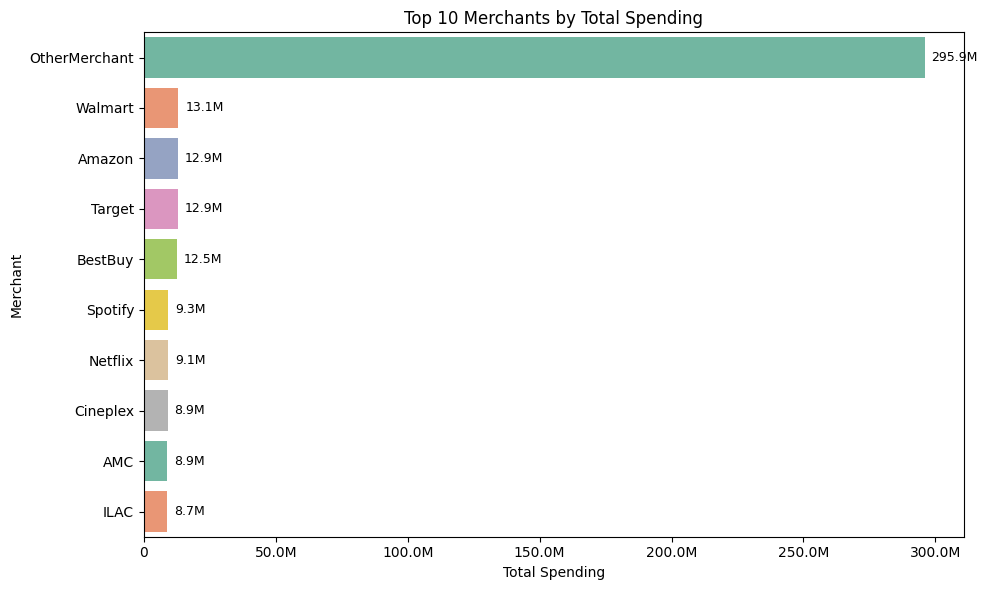

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.ticker import FuncFormatter
from IPython.display import Image, display

# Paths
OUTPUT_DIR = "output"
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "top_merchants.png")

# Load dataset
df = pd.read_csv("../data/ROSA_financial_transactions.csv")


# Clean description column
df["cleaned_description"] = df["description"].str.lower().apply(
    lambda x: re.sub(r"[\W_]+", " ", str(x)))

# Define category keywords
category_keywords = {
    "Groceries": ["supermarket", "grocery", "food", "market", "sainsbury", "tesco", "aldi", "lidl", "whole foods", "eats", "meal", "fresh"],
    "Transport": ["bus", "train", "uber", "taxi", "fuel", "petrol", "gas", "transport", "metro", "car", "ride", "road", "way", "direction"],
    "Utilities": ["electricity", "water", "internet", "rent", "utility", "bill", "mobile", "payment", "service", "home", "house", "light", "electric", "phone", "cost", "charge"],
    "Entertainment": ["movie", "cinema", "concert", "theater", "game", "bar", "restaurant", "club", "leisure", "event", "dinner", "film", "play", "show", "fun", "happy", "music", "party", "star", "enjoy"],
    "Shopping": ["store", "shop", "retail", "clothes", "amazon", "online", "purchase", "boutique", "computer", "paper", "tv", "gift", "item", "product", "sale", "new", "old", "white", "green", "big", "bag", "box", "price", "list"],
    "Health": ["pharmacy", "hospital", "doctor", "clinic", "medical", "health", "medication", "care", "drug", "medicine", "sick", "well"],
    "Travel": ["hotel", "flight", "travel", "airline", "vacation", "trip", "booking", "conference", "tour", "journey", "airport", "foreign", "destination"],
    "Education": ["school", "course", "university", "college", "tuition", "study", "book", "education", "learn", "class", "student", "teacher", "knowledge", "ability"],
    "Salary": ["salary", "paycheck", "income", "wage", "payroll"]
}

# Assign categories
df["Category"] = "Miscellaneous"
for category, keywords in category_keywords.items():
    for keyword in keywords:
        df.loc[df["cleaned_description"].str.contains(
            keyword, na=False), "Category"] = category

# Define simulated merchants per category
category_merchants = {
    "Groceries": ["Tesco", "WholeFoods", "Aldi", "Lidl"],
    "Transport": ["Uber", "Lyft", "Metro", "Greyhound"],
    "Utilities": ["HydroOne", "Bell", "Rogers", "Enbridge"],
    "Entertainment": ["Netflix", "Cineplex", "Spotify", "AMC"],
    "Shopping": ["Amazon", "Walmart", "Target", "BestBuy"],
    "Health": ["ShoppersDrugMart", "CVS", "Walgreens", "Hospital"],
    "Travel": ["AirCanada", "Delta", "Hilton", "Expedia"],
    "Education": ["Coursera", "Udemy", "Harvard", "ILAC"],
    "Salary": ["CompanyPayroll"],
    "Miscellaneous": ["OtherMerchant"]
}

# Assign simulated merchant based on category
df["merchant"] = df["Category"].apply(lambda cat: np.random.choice(
    category_merchants.get(cat, ["OtherMerchant"])))

# Ensure amount is numeric
df["amount"] = pd.to_numeric(df["amount"], errors="coerce").fillna(0)

# Aggregate top 10 merchants by total spending
merchant_totals = (
    df.groupby("merchant")["amount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Format function for millions and thousands


def format_currency(x, pos):
    if x >= 1_000_000:
        return f"{x * 1e-6:.1f}M"
    elif x >= 1_000:
        return f"{x * 1e-3:.1f}K"
    else:
        return f"{x:.0f}"


# Create output folder
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Plot horizontal bar chart with vibrant colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y=merchant_totals.index,
    x=merchant_totals.values,
    palette="Set2"
)

plt.title("Top 10 Merchants by Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Merchant")
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_currency))

# Add value labels above bars
for p in ax.patches:
    value = p.get_width()
    ax.annotate(
        format_currency(value, None),
        (value, p.get_y() + p.get_height() / 2),
        ha="left", va="center",
        fontsize=9, color="black",
        xytext=(5, 0),
        textcoords="offset points"
    )

plt.tight_layout()
plt.savefig(OUTPUT_FILE, bbox_inches="tight")
plt.close()

# Print results
print("Top merchants:")
print(merchant_totals.reset_index().rename(
    columns={"amount": "total_spending"}))
print(f"Chart saved to: {OUTPUT_FILE}")



# Display the saved image in the notebook
display(Image(filename=OUTPUT_FILE))



## Insights

- **OtherMerchant** accounts for the highest total spending by far, suggesting a large volume of uncategorized or miscellaneous transactions. 
- **Retail merchants** such as BestBuy, Walmart, Amazon, and Target show strong spending activity, reflecting consumer behavior focused on shopping and household purchases.
- **Entertainment platforms** like Spotify, Netflix, Cineplex, and AMC appear prominently, highlighting recurring or leisure-based expenses.
- **ILAC**, categorized under Education, also ranks in the top 10, suggesting notable investment in learning and personal development.
- The distribution shows a mix of essential (retail, education) and discretionary (entertainment) spending, which could inform future budgeting or segmentation strategies.
